In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2981 - accuracy: 0.9128 - val_loss: 0.1449 - val_accuracy: 0.9556
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1440 - accuracy: 0.9569 - val_loss: 0.1089 - val_accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1081 - accuracy: 0.9673 - val_loss: 0.0937 - val_accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0865 - accuracy: 0.9724 - val_loss: 0.0788 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0738 - accuracy: 0.9770 - val_loss: 0.0777 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0660 - accuracy: 0.9787 - val_loss: 0.0791 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0587 - accuracy: 0.9806 - val_loss: 0.0764 - val_accuracy:

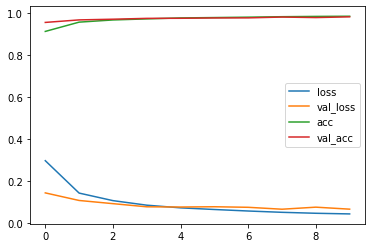

In [4]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [5]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9821
[0.06753695011138916, 0.9821000099182129]


In [6]:
# Convert the model to TFLite format

# Create a converter object
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tflite_model = converter.convert()

# Save to file
with open("converted_model.tflite", "wb") as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp2v13wq0s/assets


In [7]:
# Check if it exists
!ls

converted_model.tflite	sample_data
